# PA5

## Q.1

### Q.1.(a)

**Ans.1.(a):** 

Restricted Boltzman machine (RBM) is a special type of Botzman machine with only connections permitted between visible units (input units) & hidden units. In RBM each visible unit is connected with one connection to each of the hidden unit. However there is no connection b/w themselves.

RBM uses the concept of Energy from the physics which defines the stability of the system. RBM uses the concept of Energy & relates it to the probability distribution of the data in order to conceptualize a model. Our goal is to learn the relationship b/w visible units & hidden units.

Thus, training the model becomes a task of minimizing the energy function for the given data. So let's define the RBM:

$$x : visible \ features \ (Binary)$$
$$h : hidden \ features \ (Binary)$$
$$W : connection/weight \ matrix$$
$$b : bias \ for \ hidden \ layer$$
$$c : bias \ for \ visible \ layer$$

Energy Function:
  $$\begin{aligned}
E(\mathbf{x}, \mathbf{h}) &=-\mathbf{h}^{\top} \mathbf{W} \mathbf{x}-\mathbf{c}^{\top} \mathbf{x}-\mathbf{b}^{\top} \mathbf{h} \\
&=-\sum_{j} \sum_{k} W_{j, k} h_{j} x_{k}-\sum_{k} c_{k} x_{k}-\sum_{j} b_{j} h_{j}
\end{aligned}$$

Probability Function (which is related to energy function):
  $$\begin{aligned}
p(\mathbf{x}, \mathbf{h}) &=\exp (-E(\mathbf{x}, \mathbf{h})) / Z \\
&=\exp \left(\mathbf{h}^{\top} \mathbf{W} \mathbf{x}+\mathbf{c}^{\top} \mathbf{x}+\mathbf{b}^{\top} \mathbf{h}\right) / Z \\
&=\exp \left(\mathbf{h}^{\top} \mathbf{W} \mathbf{x}\right) \exp \left(\mathbf{c}^{\top} \mathbf{x}\right) \exp \left(\mathbf{b}^{\top} \mathbf{h}\right) / Z \\
&=\prod_{j} \prod_{k} \exp \left(W_{j, k} h_{j} x_{k}\right) \prod_{k} \exp \left(c_{k} x_{k}\right) \prod_{j} \exp \left(b_{j} h_{j}\right)
\end{aligned}$$

In the above equation we have used the exponent of Energy function & manipulated the same to factorize it (Markov network). Also:
$$Z : Normalizing \ constant \ (intractable)$$
$$Z = \sum_{v,h} \exp(-E(v,h))$$

The net probability for the input data can be calculated by marginalzing the probability for 'input data' over all possible 'h'. Also, we can use the earlier relationship between Energy Function & Probability function. Thus, we'll get:

  $$\begin{aligned}
p(\mathbf{x}) &=\sum_{\mathbf{h} \in\{0,1\}^{H}} p(\mathbf{x}, \mathbf{h})=\sum_{\mathbf{h} \in\{0,1\}^{H}} \exp (-E(\mathbf{x}, \mathbf{h})) / Z \\
&=\exp [\mathbf{c}^{\top} \mathbf{x}+\sum_{j=1}^{H} \underbrace{\log \left(1+\exp \left(b_{j}+\mathbf{W}_{j \cdot \mathbf{x}}\right)\right)}_{\text {soft-plus }}) / Z \\
&=\exp (-\underbrace{F(\mathbf{x})}_{\text {Free energy }}) / Z
\end{aligned}$$

Now we have a very good idea about our objective (i.e. to increase probability). This concept is related to the idea of Energy Function & Free Energy, which should be decreased to increase the probability . Thus, we can use the concept of Negative Likelihood to compute loss function.

  $$\frac{1}{T} \sum_{t} l\left(f\left(\mathbf{x}^{(t)}\right)\right)=\frac{1}{T} \sum_{t}-\log p\left(\mathbf{x}^{(t)}\right)$$


Now, we can use the concept of Gradient Descent to calculate the optimal weights for the RBM. Thus:

  $$\frac{\partial-\log p\left(\mathbf{x}^{(t)}\right)}{\partial \theta}=\underbrace{E_{\mathbf{h}}\left[\frac{\partial E\left(\mathbf{x}^{(t)}, \mathbf{h}\right)}{\partial \theta} \mid \mathbf{x}^{(t)}\right]}_{\text {postive phase }}-\underbrace{E_{\mathbf{x}, \mathbf{h}}\left[\frac{\partial E(\mathbf{x}, \mathbf{h})}{\partial \theta}\right]}_{\text {negative phase }}$$

In the above equation:
$$expectated \ value \ for \ ({x}^{(t)},h) \ with \ {x}^{(t)} \ from \ the \ training \ samples: \underbrace{E_{\mathbf{h}}\left[\frac{\partial E\left(\mathbf{x}^{(t)}, \mathbf{h}\right)}{\partial \theta} \mid \mathbf{x}^{(t)}\right]}_{\text {postive phase }}$$

We can calculate above term using following:
  $$\begin{aligned}
p(\mathbf{h} \mid \mathbf{x}) &=\prod_{j} p\left(h_{j} \mid \mathbf{x}\right) \\
p\left(h_{j}=1 \mid \mathbf{x}\right) &=\frac{1}{1+\exp \left(-\left(b_{j}+\mathbf{W}_{j} \cdot \mathbf{x}\right)\right)} \\
&=\sigma\left(b_{j}+\mathbf{W}_{j} \cdot \mathbf{x}\right) \\
p(\mathbf{x} \mid \mathbf{h}) &=\prod_{k} p\left(x_{k} \mid \mathbf{h}\right) \\
p\left(x_{k}=1 \mid \mathbf{h}\right) &=\frac{1}{1+\exp \left(-\left(c_{k}+\mathbf{h}^{\top} \mathbf{W}_{\cdot k}\right)\right)} \\
&=\sigma\left(c_{k}+\mathbf{h}^{\top} \mathbf{W}_{\cdot k}\right)
\end{aligned}$$


However the 'negative phase' is intractable & thus is approximated using Gibbs sampling:
$$\tilde{x} : Calculated \ using \ Gibbs \ sampling$$

Thus, the equation previously calculated for the Gradient Descent is equivalent to:

  $$\begin{aligned}
\Rightarrow \frac{\partial-\log p\left(\mathbf{x}^{(t)}\right)}{\partial \theta} &=E_{\mathbf{h}}\left[\frac{\partial E\left(\mathbf{x}^{(t)}, \mathbf{h}\right)}{\partial \theta} \mid \mathbf{x}^{(t)}\right]-E_{\mathbf{x}, \mathbf{h}}\left[\frac{\partial E(\mathbf{x}, \mathbf{h})}{\partial \theta}\right] \\
&=E_{\mathbf{h}}\left[\frac{\partial E\left(\mathbf{x}^{(t)}, \mathbf{h}\right)}{\partial \theta} \mid \mathbf{x}^{(t)}\right]-E_{\mathbf{h}}\left[\frac{\partial E(\tilde{\mathbf{x}}, \mathbf{h})}{\partial \theta}\right]
\end{aligned}$$

Thus, we can get the optimal weights:

  $$\begin{array}{l}
\mathbf{W} \Longleftarrow \mathbf{W}-\alpha\left(\nabla_{\mathbf{W}}-\log p\left(\mathbf{x}^{(t)}\right)\right)=\mathbf{W}+\alpha\left(\mathbf{h}\left(\mathbf{x}^{(t)}\right) \mathbf{x}^{(t)^{\top}}-\mathbf{h}(\tilde{\mathbf{x}}) \tilde{\mathbf{x}}^{\top}\right) \\
\mathbf{b} \Longleftarrow \mathbf{b}+\alpha\left(\mathbf{h}\left(\mathbf{x}^{(t)}\right)-\mathbf{h}(\tilde{\mathbf{x}})\right) \\
\mathbf{c} \Longleftarrow \mathbf{c}+\alpha\left(\mathbf{x}^{(t)}-\tilde{\mathbf{x}}\right) \\
\text { - where } \mathbf{h}(\mathbf{x})=p(\mathbf{h} \mid \mathbf{x})
\end{array}$$


___


### Q.1.(b)

In [16]:
# Importing Dependencies
import numpy as np
import torch
import torch.utils.data
from torchvision import datasets, transforms
from torchvision.utils import make_grid , save_image
from keras.datasets import mnist
from keras.layers import Input, Dense, Lambda, Conv2D, Flatten, Reshape, Conv2DTranspose, Dropout, Activation
from keras import backend as K
from keras import objectives
from keras.utils import np_utils
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
from keras.models import Sequential, Model
from keras.layers.advanced_activations import LeakyReLU
from keras.optimizers import Adam, RMSprop
import random
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
# Loading MNIST Data (Pytorch)
batch_size = 64
train_loader = torch.utils.data.DataLoader(
datasets.MNIST('./data',
    train=True,
    download = True,
    transform = transforms.Compose(
        [transforms.ToTensor()])
     ),
     batch_size=batch_size
)

test_loader = torch.utils.data.DataLoader(
datasets.MNIST('./data',
    train=False,
    transform=transforms.Compose(
    [transforms.ToTensor()])
    ),
    batch_size=batch_size)

In [19]:
#RBM
class RBM(nn.Module):
   def __init__(self,
               visible_units=784,
               hidden_units=100,
               cycles=5):
        super(RBM, self).__init__()
        self.W = nn.Parameter(torch.randn(hidden_units,visible_units)*1e-2)
        self.c = nn.Parameter(torch.zeros(visible_units))
        self.b = nn.Parameter(torch.zeros(hidden_units))
        self.cycles = cycles
    
   def sampling_function(self,prob):
       return F.relu(torch.sign(prob - Variable(torch.rand(prob.size()))))
    
   def forward_transformation(self,visible):
        prob_h = F.sigmoid(F.linear(visible,self.W,self.b))
        sample_h = self.sampling_function(prob_h)
        return prob_h,sample_h
    
   def back_transformation(self,hidden):
        prob_v = F.sigmoid(F.linear(hidden,self.W.t(),self.c))
        sample_v = self.sampling_function(prob_v)
        return prob_v,sample_v
        
   def forward(self,visible):
        pre_h1,h1 = self.forward_transformation(visible)
        
        hidden_ = h1
        for _ in range(self.cycles):
            pre_v_,visible_ = self.back_transformation(hidden_)
            pre_h_,hidden_ = self.forward_transformation(visible_)
        
        return visible,visible_
    
   def energy_function(self,visible):
        vbias_term = visible.mv(self.c)
        wx_b = F.linear(visible,self.W,self.b)
        hidden_term = wx_b.exp().add(1).log().sum(1)
        return (-hidden_term - vbias_term).mean()

def plot(img):
    npimg = np.transpose(img.numpy(),(1,2,0))
    plt.imshow(npimg)

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1709: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


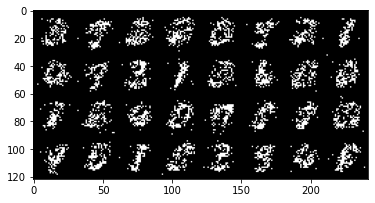

In [20]:
# 20 Hidden units
rbm = RBM(hidden_units=20)
train_op = optim.SGD(rbm.parameters(),0.01)

for epoch in range(10):
    loss_ = []
    for _, (data,target) in enumerate(train_loader):
        data = Variable(data.view(-1,784))
        sample_data = data.bernoulli()
        
        v,v1 = rbm(sample_data)
        loss = rbm.energy_function(v) - rbm.energy_function(v1)
        train_op.zero_grad()
        loss.backward()
        train_op.step()

plot(make_grid(v1.view(32,1,28,28).data))

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1709: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


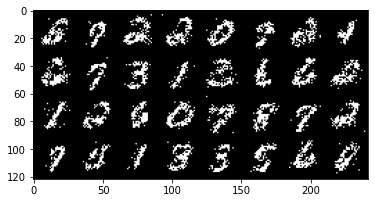

In [21]:
# 100 hidden units
rbm = RBM(hidden_units=100)
train_op = optim.SGD(rbm.parameters(),0.01)

for epoch in range(10):
    loss_ = []
    for _, (data,target) in enumerate(train_loader):
        data = Variable(data.view(-1,784))
        sample_data = data.bernoulli()
        
        v,v1 = rbm(sample_data)
        loss = rbm.energy_function(v) - rbm.energy_function(v1)
        train_op.zero_grad()
        loss.backward()
        train_op.step()

plot(make_grid(v1.view(32,1,28,28).data))

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1709: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


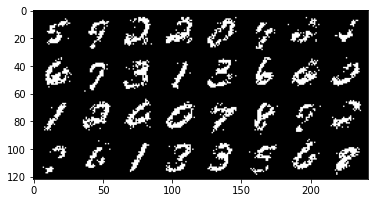

In [22]:
# 500 hidden units
rbm = RBM(hidden_units=500)
train_op = optim.SGD(rbm.parameters(),0.01)

for epoch in range(10):
    loss_ = []
    for _, (data,target) in enumerate(train_loader):
        data = Variable(data.view(-1,784))
        sample_data = data.bernoulli()
        
        v,v1 = rbm(sample_data)
        loss = rbm.energy_function(v) - rbm.energy_function(v1)
        train_op.zero_grad()
        loss.backward()
        train_op.step()

plot(make_grid(v1.view(32,1,28,28).data))

### Q.1.(c)

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1709: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


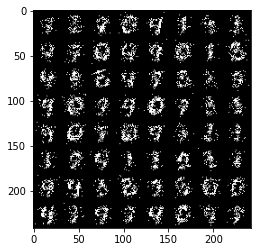

In [24]:
# 20% pixels removed
examples = enumerate(test_loader)
batch_idx, (example_data, example_targets) = next(examples)
for i in range(64):
  for j in range(int(784*0.2)):
    example_data[2][0][np.random.randint(0,high=27)][np.random.randint(0,high=27)] = 0


rbm = RBM(hidden_units=500)
train_SGD = optim.SGD(rbm.parameters(),0.01)


for epoch in range(500):
    loss_ = []

    data = Variable(example_data.view(-1,784))
    sample_data = data.bernoulli()
    
    v,v1 = rbm(sample_data)
    loss = rbm.energy_function(v) - rbm.energy_function(v1)
    train_SGD.zero_grad()
    loss.backward()
    train_SGD.step()


plot(make_grid(v1.view(64,1,28,28).data))

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1709: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


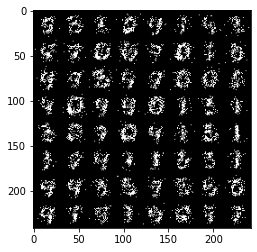

In [25]:
# 50% pixels removed
examples = enumerate(test_loader)
batch_idx, (example_data, example_targets) = next(examples)
for i in range(64):
  for j in range(int(784*0.5)):
    example_data[2][0][np.random.randint(0,high=27)][np.random.randint(0,high=27)] = 0

rbm = RBM(hidden_units=500)
train_SGD = optim.SGD(rbm.parameters(),0.01)


for epoch in range(500):
    loss_ = []

    data = Variable(example_data.view(-1,784))
    sample_data = data.bernoulli()
    
    v,v1 = rbm(sample_data)
    loss = rbm.energy_function(v) - rbm.energy_function(v1)
    train_SGD.zero_grad()
    loss.backward()
    train_SGD.step()


plot(make_grid(v1.view(64,1,28,28).data))

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1709: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


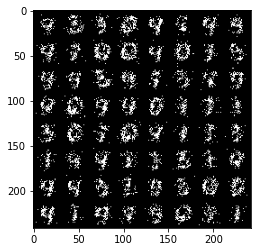

In [26]:
# 80% pixels removed
examples = enumerate(test_loader)
batch_idx, (example_data, example_targets) = next(examples)
for i in range(64):
  for j in range(int(784*0.8)):
    example_data[2][0][np.random.randint(0,high=27)][np.random.randint(0,high=27)] = 0

rbm = RBM(hidden_units=500)
train_SGD = optim.SGD(rbm.parameters(),0.01)


for epoch in range(500):
    loss_ = []

    data = Variable(example_data.view(-1,784))
    sample_data = data.bernoulli()
    
    v,v1 = rbm(sample_data)
    loss = rbm.energy_function(v) - rbm.energy_function(v1)
    train_SGD.zero_grad()
    loss.backward()
    train_SGD.step()


plot(make_grid(v1.view(64,1,28,28).data))

___

## Q.2

### Q.2.(a)

**Ans.2.(a):**

Varitationla Autoencoders (VAE) use the concepts of 2 RBM (descibed above) in tandem to generate efficient data encodings(representation) in an unsupervised learning environment.

To put simply, Autoencoder is a Feed-forward neural network made of 2 RBM connected in tandem. First RBM (Encoder) is like a normal RBM & performs the dimensionality reduction on the input data. 2nd RBM(Decoder) then uses the learnt representation to generate new synthetic data similar to input data. Although things are more complicated than as stated, but as said it's the simplest explanation for a layman. 

The relationship b/w weight matrix of Encoder & Decoder is as follow: $$ Weight \ matrix \ of \ Decoder = Transpose \ of \ Weight \ matrix \ of \ Encoder$$

We'll like to compute:
$$p(z \mid x)=\frac{p(x \mid z) p(z)}{p(x)}$$

But this is intractable. So'll approximate. However before that let's define some of the terms for VAE:

  $$\begin{array}{l}
\phi: x \rightarrow h \\
\psi: h \rightarrow x \\
\phi, \psi=\underset{\phi, \psi}{\arg \min }\|X-(\psi \circ \phi) X\|^{2}
\end{array}$$

In the above equation, we've just defined the basic idea of VAE that we described ealier in the answer (i.e. mapping representation from 'x' to 'h' & 'h' to 'x').


  $$\mathbf{h}=\sigma\left(\mathbf{W} \mathbf{x}+\mathbf{b}\right)$$
  $$\mathbf{x}^{\prime}=\sigma^{\prime}\left(\mathbf{W}^{\prime} \mathbf{h}+\mathbf{b}^{\prime}\right)$$

In the above equation, we define the normal hidden layer non-linear transformation for Encoder & Decoder.

NOTE: Enocoder & Decoder mentioned in assignment used one more hidden layer of 256 units. However, for simplicity i'm describing the hidden layer non-linear transformation ignoring that extra layer.

Next, we'll define Kullback–Leibler divergence, (also called relative entropy), is a measure of how one probability distribution is different from a second, reference probability distribution.

Thus, to complute loss function we'll use the concept of either squared errors(binary cross-entropy) OR Negative log likelihood with combination of KL Divergence. Basically we're using the modified loss function of RBM along with KL Divergence. The loss function is given by:

$$\begin{aligned}
& -Loss: \log p_{\theta}\left(x^{(i)}\right) \\
\geq &-D_{K L}\left(q_{\phi}\left(z \mid x^{(i)}\right) \mid p_{\theta}\left(z \mid x^{(i)}\right)\right)+\log p_{\theta}\left(x^{(i)}\right) \\
=& \mathcal{L}\left(\theta, \phi ; x^{(i)}\right) \\
=& \mathbf{E}_{q_{\phi}\left(z \mid x^{(i)}\right)}\left[-\log q_{\phi}\left(z \mid x^{(i)}\right)+\log p_{\theta}\left(x^{(i)}, z\right)\right] \\
=&-D_{K L}\left(q_{\phi}\left(z \mid x^{(i)}\right) \mid p_{\theta}(z)\right)+\mathbf{E}_{q_{\phi}\left(z \mid x^{(i)}\right)}\left(\log p_{\theta}\left(x^{(i)} \mid z\right)\right)
\end{aligned}$$

Now we can use the concept of Gradient Descent to find the optimal weight matrix.

### Q.2.(b)

In [27]:
# Load MNIST data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train.astype('float32')/255., x_test.astype('float32')/255.
x_train, x_test = x_train.reshape(x_train.shape[0], -1), x_test.reshape(x_test.shape[0], -1)


# Initialize hyperparameters
batch, epoch = 100, 10
n_hidden = 256

In [5]:
# VAE with 16 hidden units

hidden_dimension = 16

# Encoder
x = Input(shape=(x_train.shape[1:]))
x_encoded = Dense(256, activation='relu')(x)


mu = Dense(hidden_dimension)(x_encoded)
log_var = Dense(hidden_dimension)(x_encoded)

def sampling(args):
    z_mean_layer, z_log_var_layer = args
    batch = K.shape(z_mean_layer)[0]
    dimension = K.int_shape(z_mean_layer)[1]
    ep = K.random_normal(shape=(batch, dimension))
    return z_mean_layer + K.exp(0.5 * z_log_var_layer) * ep
    
z = Lambda(sampling, output_shape=(hidden_dimension,))([mu, log_var])

# Decoder
z_decoder1 = Dense(256, activation='relu')
y_decoder = Dense(x_train.shape[1], activation='sigmoid')

z_decoded = z_decoder1(z)
y = y_decoder(z_decoded)

# Loss Function (KL-divergence)
reconstruction_loss = objectives.binary_crossentropy(x, y) * x_train.shape[1]
kl_loss = 0.5 * K.sum(K.square(mu) + K.exp(log_var) - log_var - 1, axis = -1)
vae_loss = reconstruction_loss + kl_loss

# Initialize & train VAE 
vae = Model(x, y)
vae.add_loss(vae_loss)
vae.compile(optimizer='rmsprop')
vae.fit(x_train,
       shuffle=True,
       epochs=epoch,
       batch_size=batch,
       validation_data=(x_test, None), verbose=1)

Epoch 1/10
600/600 [==============================] - 7s 11ms/step - loss: 195.4171 - val_loss: 129.1190
Epoch 2/10
600/600 [==============================] - 6s 11ms/step - loss: 126.8345 - val_loss: 118.7783
Epoch 3/10
600/600 [==============================] - 6s 11ms/step - loss: 118.7240 - val_loss: 114.6428
Epoch 4/10
600/600 [==============================] - 6s 11ms/step - loss: 115.2247 - val_loss: 113.4855
Epoch 5/10
600/600 [==============================] - 7s 11ms/step - loss: 113.1399 - val_loss: 111.1402
Epoch 6/10
600/600 [==============================] - 6s 11ms/step - loss: 111.9479 - val_loss: 110.5403
Epoch 7/10
600/600 [==============================] - 6s 11ms/step - loss: 110.7504 - val_loss: 109.6689
Epoch 8/10
600/600 [==============================] - 6s 11ms/step - loss: 110.1680 - val_loss: 108.7478
Epoch 9/10
600/600 [==============================] - 7s 11ms/step - loss: 109.4429 - val_loss: 108.6239
Epoch 10/10
600/600 [==============================] - 

In [28]:
# VAE with 8 hidden units

hidden_dimension = 8

# Encoder
x = Input(shape=(x_train.shape[1:]))
x_encoded = Dense(256, activation='relu')(x)


mu = Dense(hidden_dimension)(x_encoded)
log_var = Dense(hidden_dimension)(x_encoded)

def sampling(args):
    z_mean_layer, z_log_var_layer = args
    batch = K.shape(z_mean_layer)[0]
    dimension = K.int_shape(z_mean_layer)[1]
    ep = K.random_normal(shape=(batch, dimension))
    return z_mean_layer + K.exp(0.5 * z_log_var_layer) * ep
    
z = Lambda(sampling, output_shape=(hidden_dimension,))([mu, log_var])

# Decoder
z_decoder1 = Dense(256, activation='relu')
y_decoder = Dense(x_train.shape[1], activation='sigmoid')

z_decoded = z_decoder1(z)
y = y_decoder(z_decoded)

# Loss Function (KL-divergence)
reconstruction_loss = objectives.binary_crossentropy(x, y) * x_train.shape[1]
kl_loss = 0.5 * K.sum(K.square(mu) + K.exp(log_var) - log_var - 1, axis = -1)
vae_loss = reconstruction_loss + kl_loss

# Initialize & train VAE 
vae = Model(x, y)
vae.add_loss(vae_loss)
vae.compile(optimizer='rmsprop')
vae.fit(x_train,
       shuffle=True,
       epochs=epoch,
       batch_size=batch,
       validation_data=(x_test, None), verbose=1)

Epoch 1/10
600/600 [==============================] - 9s 13ms/step - loss: 197.9394 - val_loss: 134.4958
Epoch 2/10
600/600 [==============================] - 8s 13ms/step - loss: 132.5609 - val_loss: 125.8122
Epoch 3/10
600/600 [==============================] - 8s 13ms/step - loss: 125.8935 - val_loss: 122.8713
Epoch 4/10
600/600 [==============================] - 8s 13ms/step - loss: 122.7650 - val_loss: 121.1889
Epoch 5/10
600/600 [==============================] - 8s 13ms/step - loss: 121.2654 - val_loss: 119.0987
Epoch 6/10
600/600 [==============================] - 8s 13ms/step - loss: 120.0128 - val_loss: 118.9957
Epoch 7/10
600/600 [==============================] - 8s 13ms/step - loss: 118.8973 - val_loss: 117.9038
Epoch 8/10
600/600 [==============================] - 8s 13ms/step - loss: 118.1231 - val_loss: 117.1126
Epoch 9/10
600/600 [==============================] - 8s 13ms/step - loss: 117.4695 - val_loss: 116.3579
Epoch 10/10
600/600 [==============================] - 

In [29]:
# VAE with 2 hidden units

hidden_dimension = 2

# Encoder
x = Input(shape=(x_train.shape[1:]))
x_encoded = Dense(256, activation='relu')(x)


mu = Dense(hidden_dimension)(x_encoded)
log_var = Dense(hidden_dimension)(x_encoded)

def sampling(args):
    z_mean_layer, z_log_var_layer = args
    batch = K.shape(z_mean_layer)[0]
    dimension = K.int_shape(z_mean_layer)[1]
    ep = K.random_normal(shape=(batch, dimension))
    return z_mean_layer + K.exp(0.5 * z_log_var_layer) * ep
    
z = Lambda(sampling, output_shape=(hidden_dimension,))([mu, log_var])

# Decoder
z_decoder1 = Dense(256, activation='relu')
y_decoder = Dense(x_train.shape[1], activation='sigmoid')

z_decoded = z_decoder1(z)
y = y_decoder(z_decoded)

# Loss Function (KL-divergence)
reconstruction_loss = objectives.binary_crossentropy(x, y) * x_train.shape[1]
kl_loss = 0.5 * K.sum(K.square(mu) + K.exp(log_var) - log_var - 1, axis = -1)
vae_loss = reconstruction_loss + kl_loss

# Initialize & train VAE 
vae = Model(x, y)
vae.add_loss(vae_loss)
vae.compile(optimizer='rmsprop')
vae.fit(x_train,
       shuffle=True,
       epochs=epoch,
       batch_size=batch,
       validation_data=(x_test, None), verbose=1)

Epoch 1/10
600/600 [==============================] - 9s 13ms/step - loss: 220.7399 - val_loss: 172.0793
Epoch 2/10
600/600 [==============================] - 8s 13ms/step - loss: 171.0591 - val_loss: 168.6719
Epoch 3/10
600/600 [==============================] - 8s 13ms/step - loss: 167.2469 - val_loss: 165.5963
Epoch 4/10
600/600 [==============================] - 8s 13ms/step - loss: 165.0378 - val_loss: 164.0464
Epoch 5/10
600/600 [==============================] - 8s 13ms/step - loss: 163.2503 - val_loss: 163.0124
Epoch 6/10
600/600 [==============================] - 8s 13ms/step - loss: 162.4726 - val_loss: 161.5138
Epoch 7/10
600/600 [==============================] - 8s 13ms/step - loss: 160.9015 - val_loss: 160.4141
Epoch 8/10
600/600 [==============================] - 8s 13ms/step - loss: 159.7379 - val_loss: 159.7531
Epoch 9/10
600/600 [==============================] - 8s 13ms/step - loss: 159.0066 - val_loss: 159.1195
Epoch 10/10
600/600 [==============================] - 

### Q.2.(c)

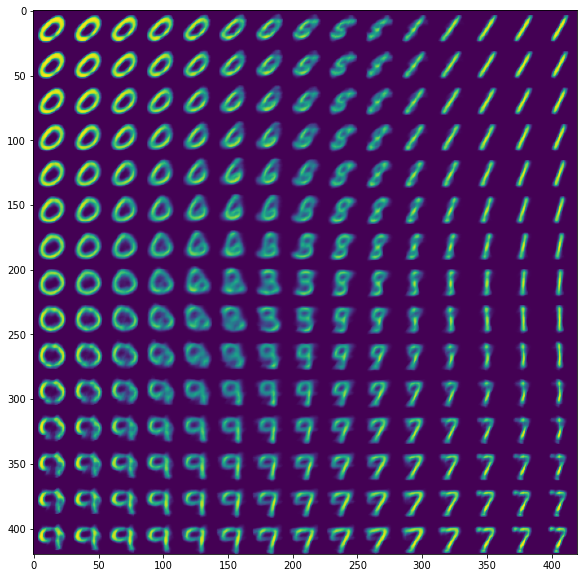

In [37]:
# Extract Decoder from the previous VAE
hidden_dimension = 2
decoder_input = Input(shape=(hidden_dimension,))
_z_decoded = z_decoder1(decoder_input)
_y = y_decoder(_z_decoded)
generator = Model(decoder_input, _y)


# Plot digits
n = 15
digit_size = 28
figure = np.zeros((digit_size * n, digit_size * n))


# Getting Random values b/w (-3 & 3)
rand_1 = np.linspace(-3, 3, n)
rand_2 = np.linspace(-3, 3, n)


for i, yi in enumerate(rand_1):
    for j, xi in enumerate(rand_2):
        z_sample = np.array([[xi, yi]])
        x_decoded = generator.predict(z_sample)
        digit = x_decoded[0].reshape(digit_size, digit_size)
        figure[i * digit_size: (i + 1) * digit_size,
               j * digit_size: (j + 1) * digit_size] = digit

plt.figure(figsize=(10, 10))
plt.imshow(figure)
plt.show()

___

## Q.3 
CNN training was taking time. So i had to reduce the number of 'epochs'.

In [39]:
# Loading MNIST Data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
img_size = x_train.shape[1]
x_train = np.reshape(x_train,[-1, img_size,img_size,1])
x_test = np.reshape(x_test,[-1, img_size,img_size,1])
x_train= x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
img_shape = (28, 28, 1)
batch = 128


# Encoder
encoder_inputs = Input(shape=img_shape, name='input_encoder')
x = Conv2D(128, 3, padding='same', activation='relu')(encoder_inputs)
x = Conv2D(256, 3, padding='same', activation='relu', strides=(2, 2))(x)
before_flatten_shape= K.int_shape(x)
x = Flatten()(x)
x = Dense(32, activation='relu')(x)

hidden_dimension = 16
mu = Dense(hidden_dimension)(x)
log_var = Dense(hidden_dimension)(x)


def sampling(args):
    mu, log_var = args
    eps = K.random_normal(shape=(batch, hidden_dimension), mean=0., stddev=1.0)
    return mu + K.exp(log_var) * eps

z = Lambda(sampling, output_shape=(hidden_dimension,))([mu, log_var])
    

# Initialize Encoder
encoder = Model(encoder_inputs, [mu, log_var, z], name='encoder')

# Decoder
decoder_inputs = Input(K.int_shape(z)[1:]) 
x = Dense(np.prod(before_flatten_shape[1:]),activation='relu')(decoder_inputs)
x = Reshape(before_flatten_shape[1:])(x)
x = Conv2DTranspose(32, 3,padding='same', activation='relu',strides=(2, 2))(x)
x = Conv2D(1, 3, padding='same', activation='sigmoid')(x)

# Initialize Decoder
decoder = Model(decoder_inputs, x, name='decoder')
z_decoded = decoder(z)
x = K.flatten(encoder_inputs)
z_decoded = K.flatten(z_decoded)
reconstruction_loss = objectives.binary_crossentropy(x, z_decoded)

# Loss
kl_loss = 0.5 * K.sum(K.square(mu) + K.exp(log_var) - log_var - 1, axis = -1)
vae_loss = reconstruction_loss + kl_loss

# Initialize VAE
vae = Model(encoder_inputs, z_decoded)
vae.add_loss(vae_loss)
vae.compile(optimizer='rmsprop')

epoch = 4
batch =16
vae.fit(x=x_train, y=None,
       shuffle=True,
       epochs=epoch,
       batch_size=batch,
       validation_data=(x_test, None), verbose=1)

Epoch 1/4
3750/3750 [==============================] - 801s 213ms/step - loss: 0.2823 - val_loss: 0.2633
Epoch 2/4
3750/3750 [==============================] - 805s 215ms/step - loss: 0.2639 - val_loss: 0.2631
Epoch 3/4
3750/3750 [==============================] - 806s 215ms/step - loss: 0.2637 - val_loss: 0.2630
Epoch 4/4
3750/3750 [==============================] - 805s 215ms/step - loss: 0.2636 - val_loss: 0.2632


CNN training was taking time. So i had to reduce the number of 'epochs'.

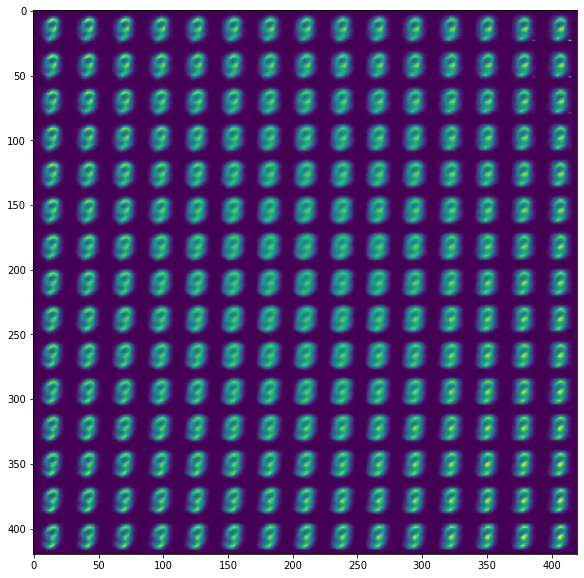

In [40]:
n = 15 
digit_size = 28
figure = np.zeros((digit_size * n, digit_size * n))

# Getting Random Values between (-3 & 3)
rand_x = np.linspace(-3, 3, n)
rand_y = np.linspace(-3, 3, n)

for i, yi in enumerate(rand_x):
    for j, xi in enumerate(rand_y):
        z_sample = np.array([[xi, yi, xi, yi, xi, yi, xi, yi, xi, yi, xi, yi, xi, yi, xi, yi]])
        x_decoded = decoder.predict(z_sample)
        digit = x_decoded[0].reshape(digit_size, digit_size)
        figure[i * digit_size: (i + 1) * digit_size,
               j * digit_size: (j + 1) * digit_size] = digit

plt.figure(figsize=(10, 10))
plt.imshow(figure)
plt.show()

## Q.4

Epoch : 1


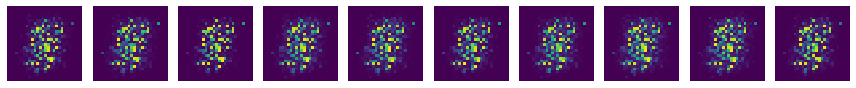

Epoch : 2


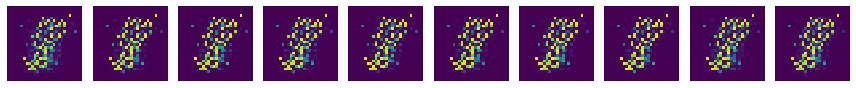

Epoch : 3


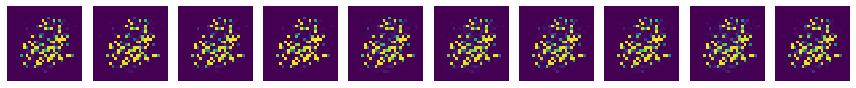

Epoch : 4


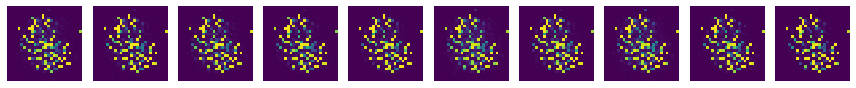

Epoch : 5


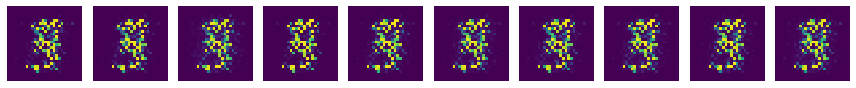

Epoch : 6


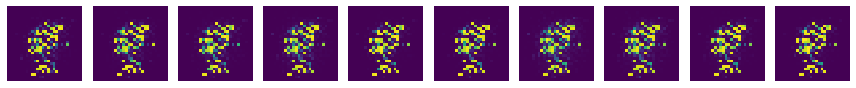

Epoch : 7


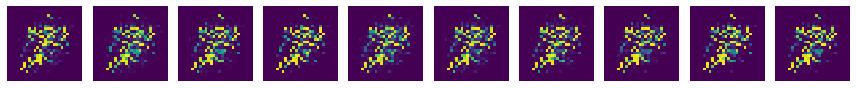

Epoch : 8


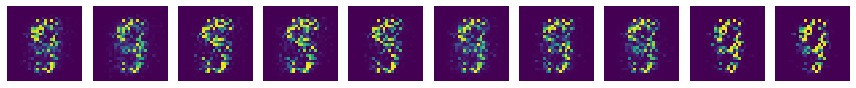

Epoch : 9


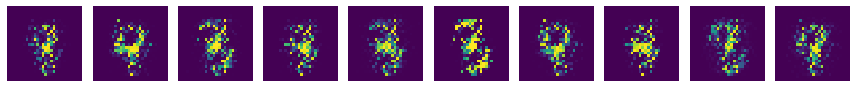

Epoch : 10


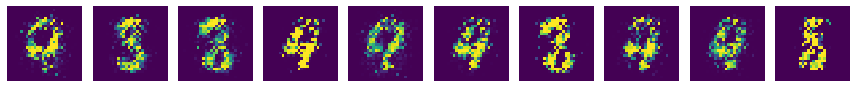

Epoch : 11


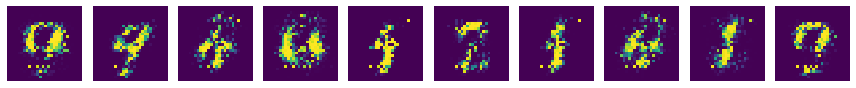

Epoch : 12


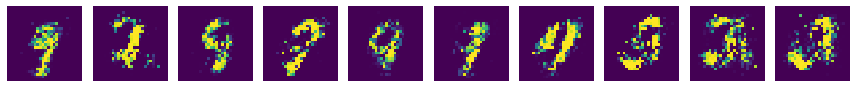

Epoch : 13


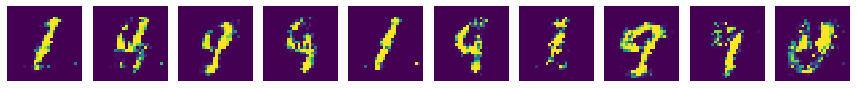

Epoch : 14


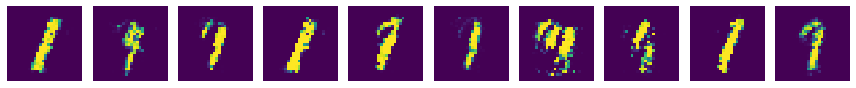

Epoch : 15


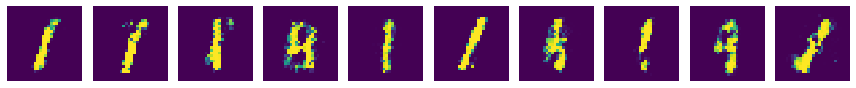

Epoch : 16


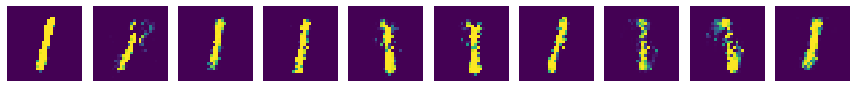

Epoch : 17


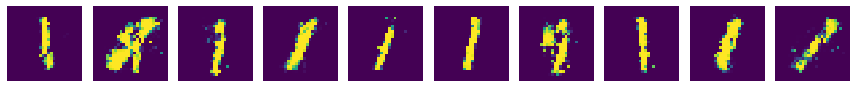

Epoch : 18


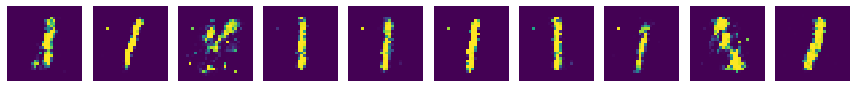

Epoch : 19


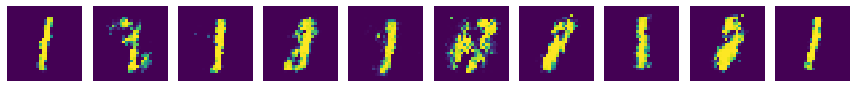

Epoch : 20


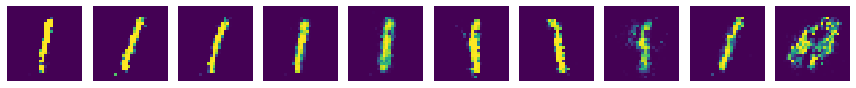

Epoch : 21


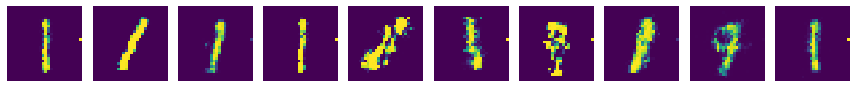

Epoch : 22


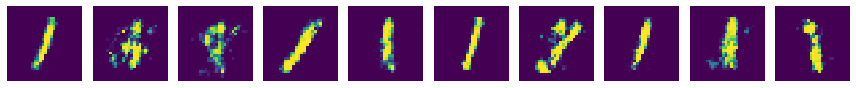

Epoch : 23


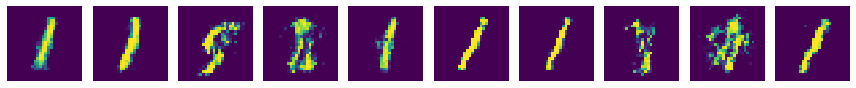

Epoch : 24


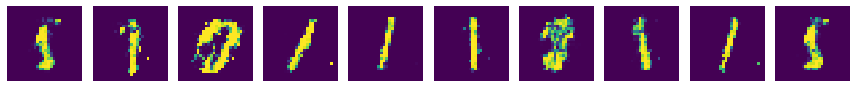

Epoch : 25


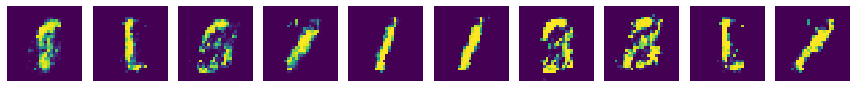

Epoch : 26


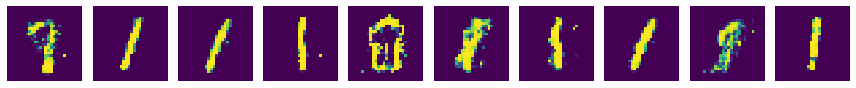

Epoch : 27


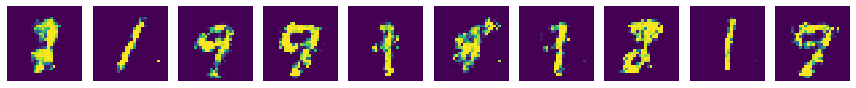

Epoch : 28


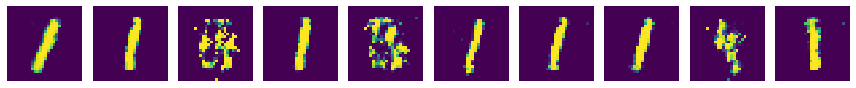

Epoch : 29


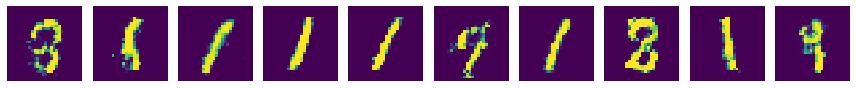

Epoch : 30


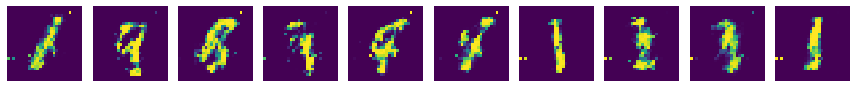

Epoch : 31


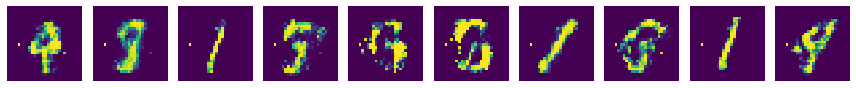

Epoch : 32


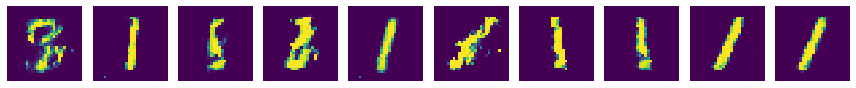

Epoch : 33


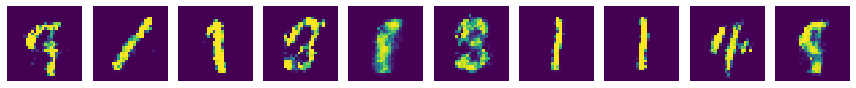

Epoch : 34


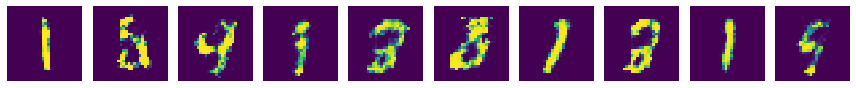

Epoch : 35


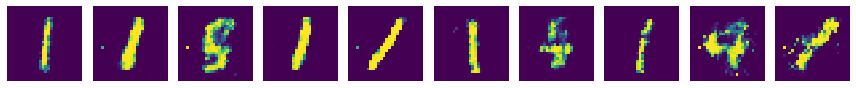

Epoch : 36


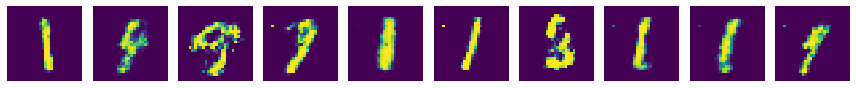

Epoch : 37


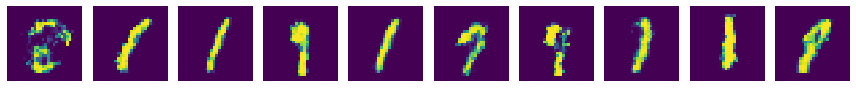

Epoch : 38


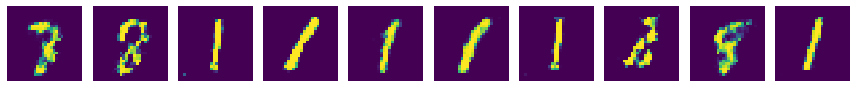

Epoch : 39


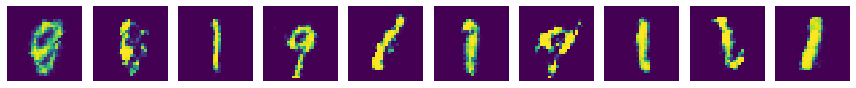

Epoch : 40


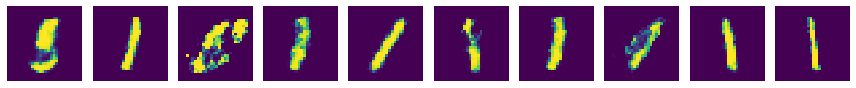

Epoch : 41


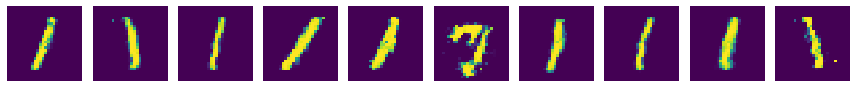

Epoch : 42


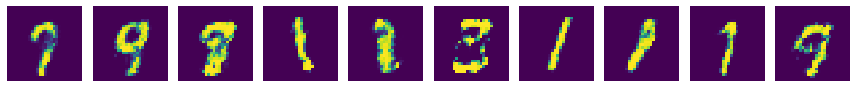

Epoch : 43


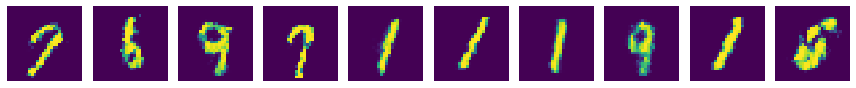

Epoch : 44


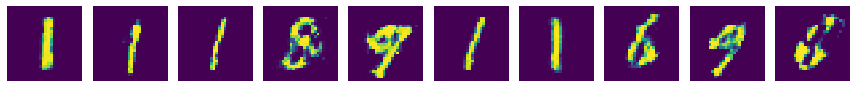

Epoch : 45


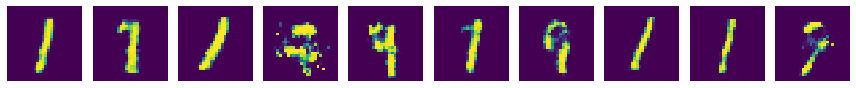

Epoch : 46


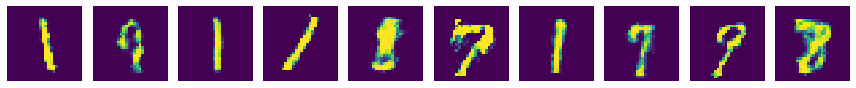

Epoch : 47


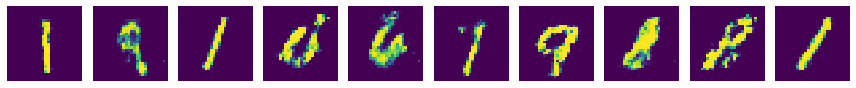

Epoch : 48


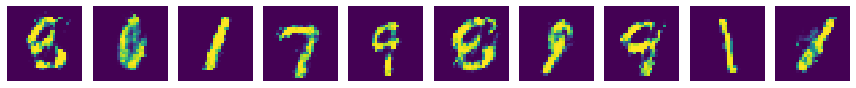

Epoch : 49


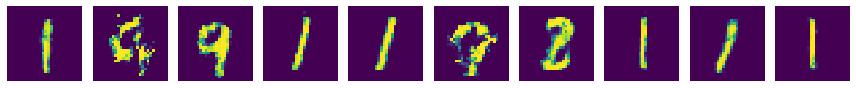

Epoch : 50


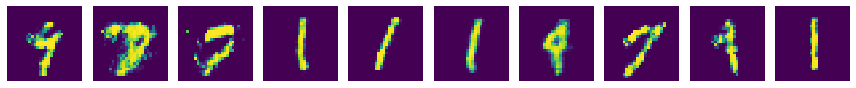

Epoch : 51


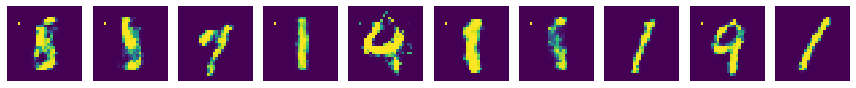

Epoch : 52


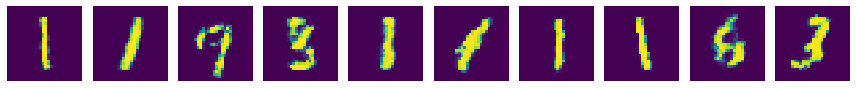

Epoch : 53


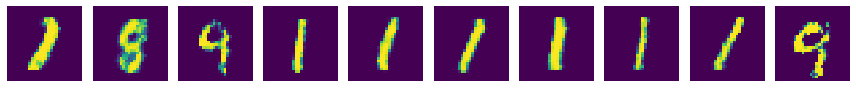

Epoch : 54


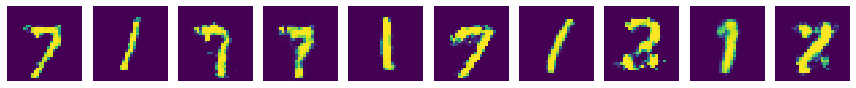

Epoch : 55


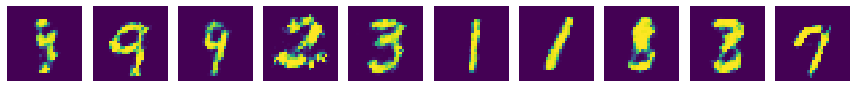

Epoch : 56


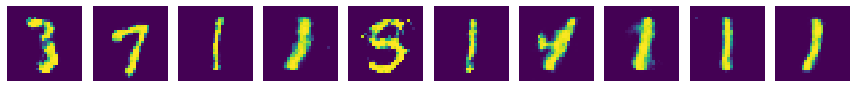

Epoch : 57


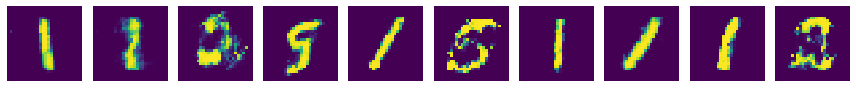

Epoch : 58


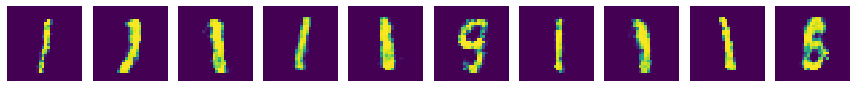

Epoch : 59


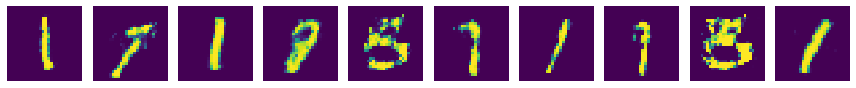

Epoch : 60


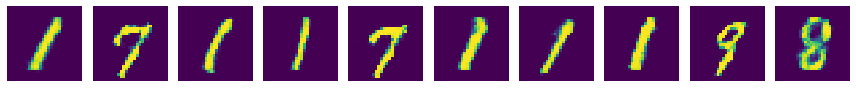

Epoch : 61


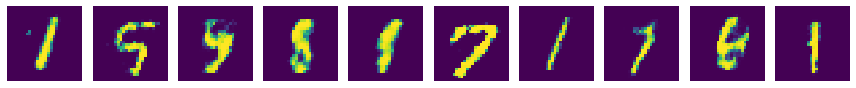

Epoch : 62


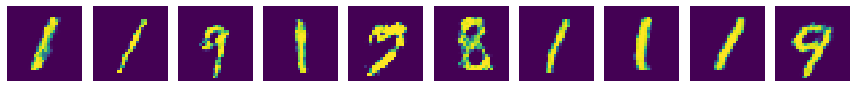

Epoch : 63


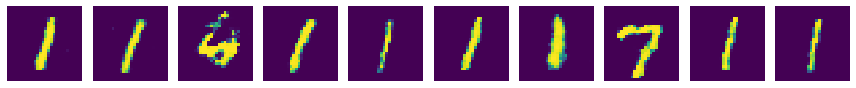

Epoch : 64


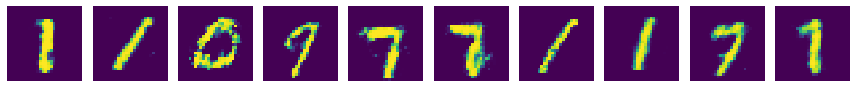

Epoch : 65


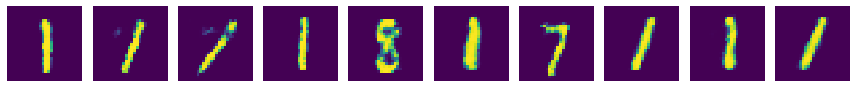

Epoch : 66


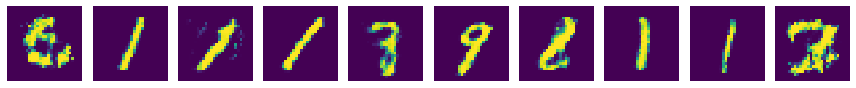

Epoch : 67


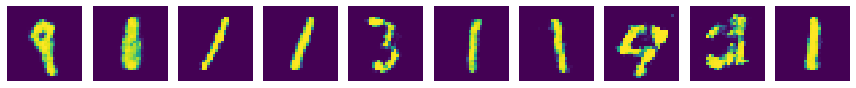

Epoch : 68


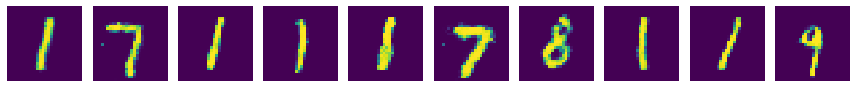

Epoch : 69


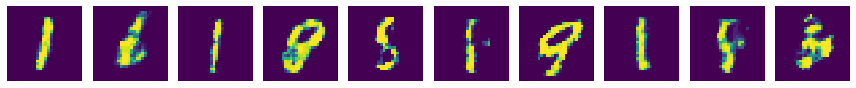

Epoch : 70


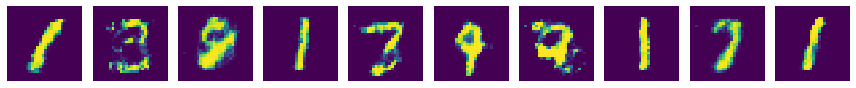

Epoch : 71


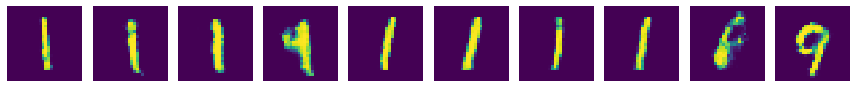

Epoch : 72


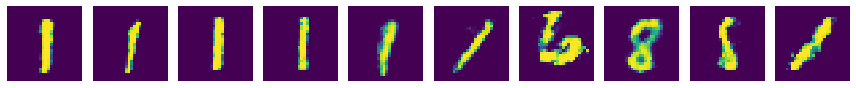

Epoch : 73


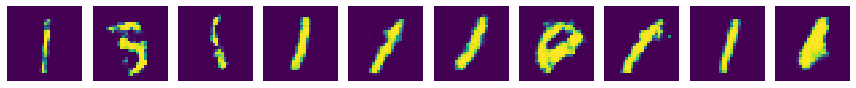

Epoch : 74


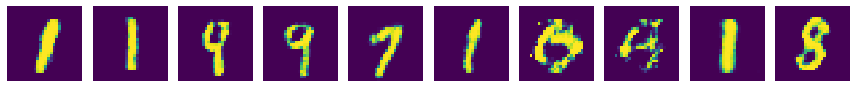

Epoch : 75


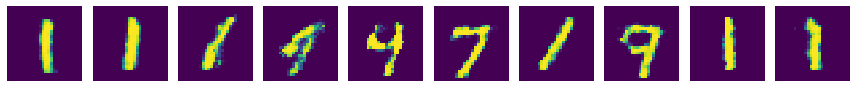

Epoch : 76


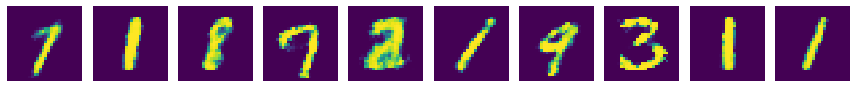

Epoch : 77


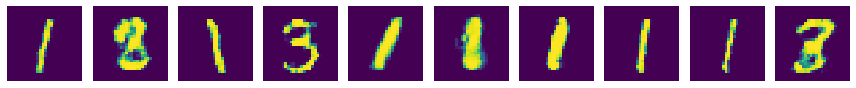

Epoch : 78


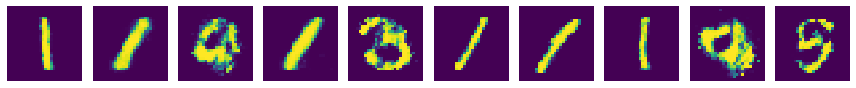

Epoch : 79


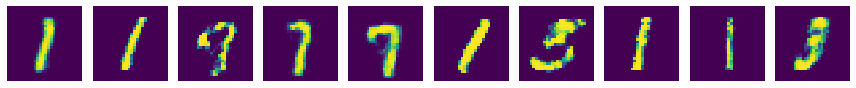

Epoch : 80


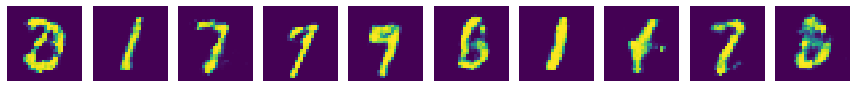

Epoch : 81


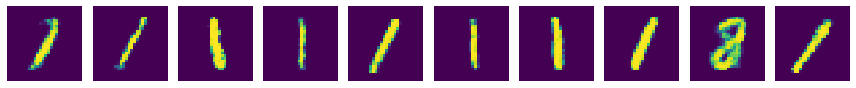

Epoch : 82


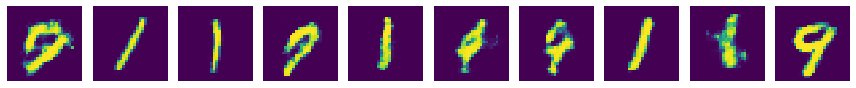

Epoch : 83


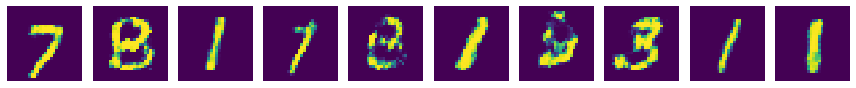

Epoch : 84


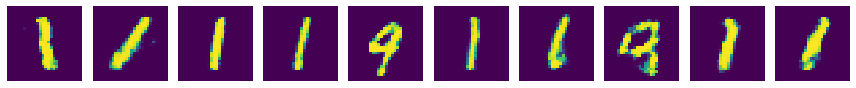

Epoch : 85


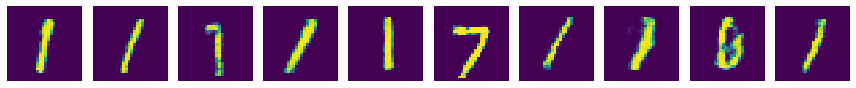

Epoch : 86


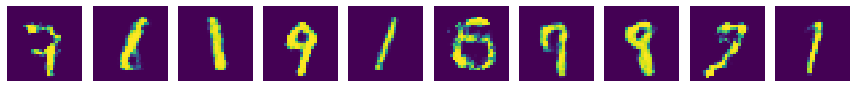

Epoch : 87


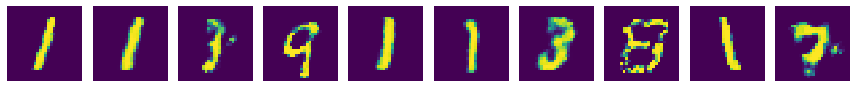

Epoch : 88


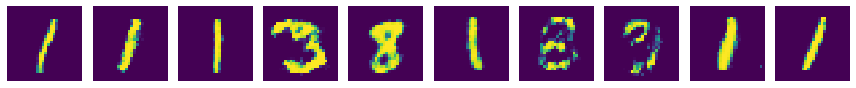

Epoch : 89


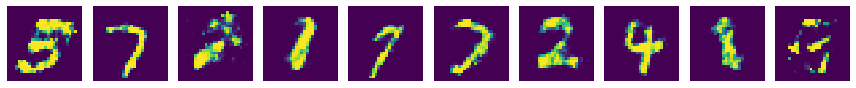

Epoch : 90


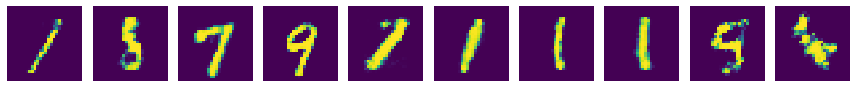

Epoch : 91


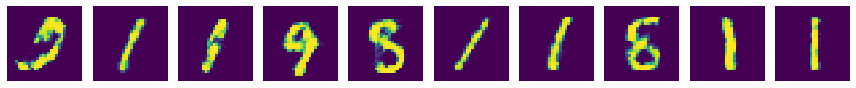

Epoch : 92


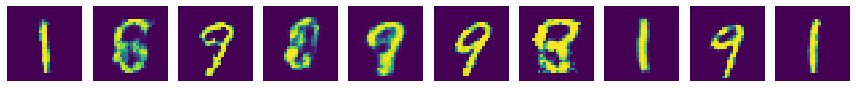

Epoch : 93


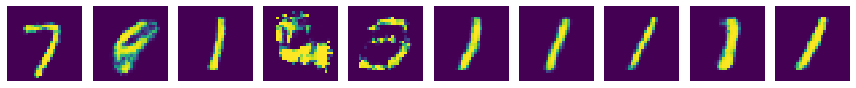

Epoch : 94


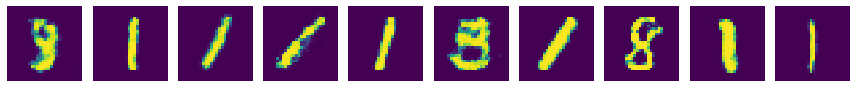

Epoch : 95


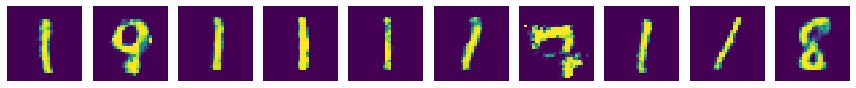

Epoch : 96


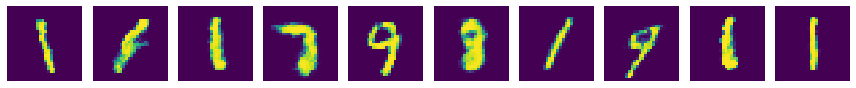

Epoch : 97


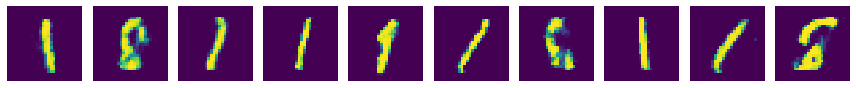

Epoch : 98


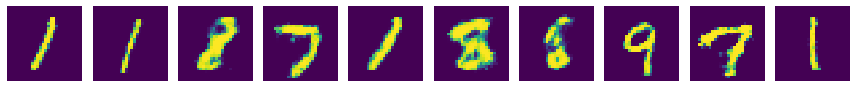

Epoch : 99


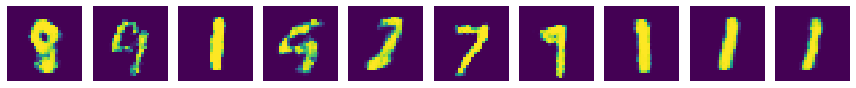

Epoch : 100


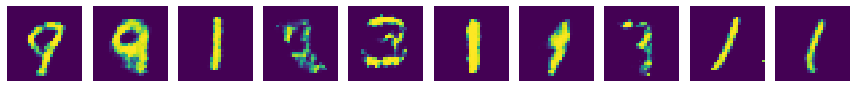

In [38]:
# Load MNIST data
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

hidden_dimension = 100

# Define GAN Model (Generator)
g = Sequential()
g.add(Dense(128, input_dim=hidden_dimension, activation=LeakyReLU(alpha=0.2)))
g.add(Dense(256, activation=LeakyReLU(alpha=0.2)))
g.add(Dense(784, activation='sigmoid'))
g.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0002, beta_1=0.5), metrics=['accuracy'])

# Define GAN Model (Discriminator)
d = Sequential()
d.add(Dense(256, input_dim=784, activation=LeakyReLU(alpha=0.2)))
d.add(Dense(128, activation=LeakyReLU(alpha=0.2)))
d.add(Dense(1, activation='sigmoid'))
d.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0002, beta_1=0.5), metrics=['accuracy'])

d.trainable = False
inputs = Input(shape=(hidden_dimension, ))
hidden = g(inputs)
output = d(hidden)
gan = Model(inputs, output)
gan.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0002, beta_1=0.5), metrics=['accuracy'])


def plot_fig(n_ex=10, dim=(1, 10), figsize=(12, 2)):
    noise = np.random.normal(0, 1, size=(n_ex, hidden_dimension))
    generated_images = g.predict(noise)
    generated_images = generated_images.reshape(n_ex, 28, 28)

    plt.figure(figsize=figsize)
    for i in range(generated_images.shape[0]):
        plt.subplot(dim[0], dim[1], i+1)
        plt.imshow(generated_images[i], interpolation='nearest')
        plt.axis('off')
    plt.tight_layout()
    plt.show()



def GAN():
    epochs=100 
    BATCH_SIZE=128
    batchCount = int(X_train.shape[0] / BATCH_SIZE)
    
    for e in range(1, epochs+1):
        print('Epoch :',e)
        for _ in range(batchCount):
            images_pre = X_train[np.random.randint(0, X_train.shape[0], size=BATCH_SIZE)]
            randomness = np.random.normal(0, 1, size=(BATCH_SIZE, hidden_dimension))
            images_gen = g.predict(randomness)
            X = np.concatenate((images_pre, images_gen))
            y = np.zeros(2*BATCH_SIZE)
            y[:BATCH_SIZE] = 0.8  
            d.trainable = True
            d_loss = d.train_on_batch(X, y)
            randomness = np.random.normal(0, 1, size=(BATCH_SIZE, hidden_dimension))
            y2 = np.ones(BATCH_SIZE)
            d.trainable = False
            g_loss = gan.train_on_batch(randomness, y2)
        plot_fig()
        
GAN()

___